# Clustering Homework
- Execute the below code and complete the following questions. __DO NOT commit the csv file__ 

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np

def generate_data():
    
    X, y = make_classification(n_samples=4000, 
                          n_features=50, 
                          n_redundant=30, 
                          n_repeated=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          class_sep = 0.9,
                          random_state = 1200,
                          scale=1
                         )

    colNames = ['var'+str(x) for x in range(50)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1), columns=colNames)
    
    df['var0'] = np.where(df['var0'] < 0, 'a', np.where(df['var0'] < 0.5, 'b', 'c'))
    df['var1'] = np.where(df['var1'] < -.5, 'd', np.where(df['var1'] < 0.4, 'e', 'f'))
    df['var2'] = np.where(df['var2'] < 0, 'g', np.where(df['var2'] < 0.5, 'h', 'i'))

    df.to_csv('clustering-data.csv', index=False)

generate_data()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clustering-data.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,a,d,g,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,a,d,i,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,a,d,g,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,b,e,i,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,a,d,h,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   object 
 1   var1    4000 non-null   object 
 2   var2    4000 non-null   object 
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

# Data Definitions
- `var0` - `var49`: some feature that could be used to describe the `target`.  
- `target`: variable that contains the classes. This is your target variable.

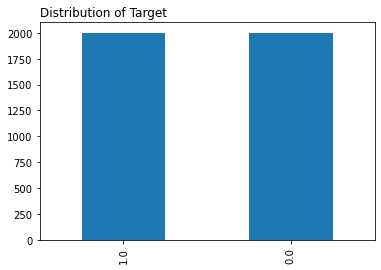

In [4]:
df.target.value_counts().plot.bar()
plt.title('Distribution of Target', loc='left')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 3200
Test examples: 800

Feature names:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19	var20	var21	var22	var23	var24	var25	var26	var27	var28	var29	var30	var31	var32	var33	var34	var35	var36	var37	var38	var39	var40	var41	var42	var43	var44	var45	var46	var47	var48	var49


# Question 1
- Using `X_train`, you will perform k-means clustering using best practices.  
- Determine what the "optimum" number of clusters is - support your answer.  
- Visualize the results of your clustering using PCA.
- Based on the visualization, how do you interpret the clustering result?

In [6]:
# Insert Code

## Importing the libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")

### Dividing dataframe into numerical and categorical features

In [8]:
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(exclude=['number']).columns.tolist()
numerical_features.remove('target')

# Print the numerical and categorical features
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15', 'var16', 'var17', 'var18', 'var19', 'var20', 'var21', 'var22', 'var23', 'var24', 'var25', 'var26', 'var27', 'var28', 'var29', 'var30', 'var31', 'var32', 'var33', 'var34', 'var35', 'var36', 'var37', 'var38', 'var39', 'var40', 'var41', 'var42', 'var43', 'var44', 'var45', 'var46', 'var47', 'var48', 'var49']
Categorical Features: ['var0', 'var1', 'var2']


### Pipeline with standard scaler (for numerical features) and OneHotEncoder (for categorical features)

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_train_p = preprocessor.fit_transform(X_train)

### Plotting the elbow plot to find the optimal number of clusters

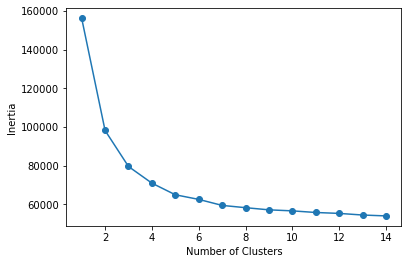

In [10]:
distortions = list()

for i in range(1, 15):
    km = KMeans(n_clusters=i, random_state=0, n_init='auto')
    km = km.fit(X_train_p)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

**From the elbow plot, I can say that from cluster number 9, the plot starts gradually decreasing.**

In [11]:
k = 9 

km = KMeans(n_clusters=k, random_state=42)

km_labels = km.fit_predict(X_train_p)

In [12]:
km_labels

array([6, 3, 0, ..., 7, 1, 2])

In [13]:
pd.Series(km_labels).value_counts()

7    585
1    450
3    432
2    427
6    424
0    249
8    241
5    232
4    160
dtype: int64

In [14]:
pd.Series(km_labels).nunique()

9

### Plotting the clustering using PCA

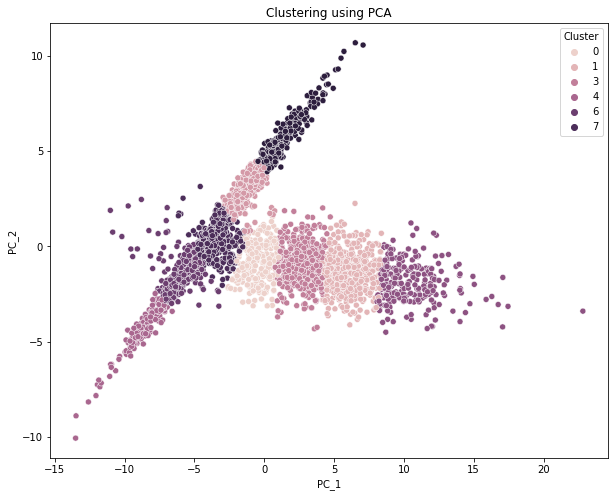

In [15]:
pca = PCA(n_components=2)
k_pca = pca.fit_transform(X_train_p)

df_pca = pd.DataFrame({'PC_1': k_pca[:, 0], 'PC_2': k_pca[:, 1], 'Cluster': km_labels})

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC_1', y='PC_2', hue='Cluster', data=df_pca)
plt.title('Clustering using PCA')
plt.show()

**Insert conclusions**

**In the above cells, I have done the following:-**

- Dividing the dataframe into numerical and categorical features.
- Create a preprocessor pipeline with StandardScaler and OneHotEncoder, fit and transform the X_train.
- Elbow plot is plotted to determine the optimal number of clusters (9 started gradually decreasing).
- K-means clustering is also done.
- Done the k-means clustering using PCA.

**From the visualization, I can say that the data is clearly separated with some overlapping which means that this clustering might successfully identify the data points.**

# Question 2
- Using `X_train` and `y_train`, create a logistic regression model. Then evaluate the performance on the test data. The only preprocessing steps you should include are scaling and one hot encoding.    
- Using cross-validation and grid search on the regularization strength using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [16]:
# Insert Code

### Preprocessor pipeline

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

### Pipeline for implementing preprocessor and LogisticRegression.

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

lr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(penalty=None))
])

In [19]:
lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['var3', 'var4', 'var5',
                                                   'var6', 'var7', 'var8',
                                                   'var9', 'var10', 'var11',
                                                   'var12', 'var13', 'var14',
                                                   'var15', 'var16', 'var17',
                                                   'var18', 'var19', 'var20',
                                                   'var21', 'var22', 'var23',
                                                   'var24', 'var25', 'var26',
                                                   'var27', 'var28', 'var29',
                                                   'var30', 'var31', 'var32', ...]),
                                                 ('cat', OneHotEncoder(),
                                                  ['var0', 'var1', 'var2'])])),
                ('logreg', LogisticRegression(penalty=None))])

In [20]:
y_train_predictions = lr_model.predict_proba(X_train)
y_train_predictions[:5]

array([[8.65313503e-01, 1.34686497e-01],
       [2.32116523e-02, 9.76788348e-01],
       [4.04619442e-02, 9.59538056e-01],
       [2.12494107e-04, 9.99787506e-01],
       [7.31211191e-01, 2.68788809e-01]])

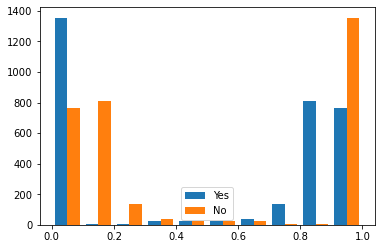

In [21]:
plt.hist(y_train_predictions)
plt.legend(['Yes', 'No'])
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix

y_train_predictions = lr_model.predict(X_train)

print(confusion_matrix(y_train, y_train_predictions))

[[1599    6]
 [ 185 1410]]


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_predictions))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.94      1605
         1.0       1.00      0.88      0.94      1595

    accuracy                           0.94      3200
   macro avg       0.95      0.94      0.94      3200
weighted avg       0.95      0.94      0.94      3200



In [24]:
y_test_predictions = lr_model.predict_proba(X_test)
y_test_predictions[:5]

array([[0.00812727, 0.99187273],
       [0.00346742, 0.99653258],
       [0.90732575, 0.09267425],
       [0.00664991, 0.99335009],
       [0.88115011, 0.11884989]])

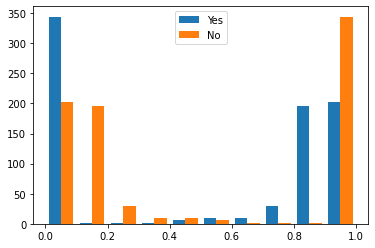

In [25]:
plt.hist(y_test_predictions)
plt.legend(['Yes', 'No'])
plt.show()

In [26]:
from sklearn.metrics import confusion_matrix

y_test_predictions = lr_model.predict(X_test)

print(confusion_matrix(y_test, y_test_predictions))

[[390   4]
 [ 56 350]]


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predictions))

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       394
         1.0       0.99      0.86      0.92       406

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.92       800
weighted avg       0.93      0.93      0.92       800



### Plotting the ROC_AUC curve

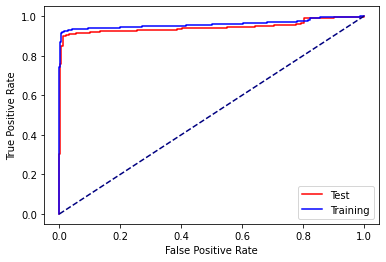

In [28]:
from sklearn.metrics import roc_curve

def generate_probs(X, model= lr_model):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs, pos_label= 1)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [29]:
from sklearn.metrics import roc_auc_score

print ('training: ', roc_auc_score(y_train, generate_probs(X_train)))
print ('testing: ', roc_auc_score(y_test, generate_probs(X_test)))

training:  0.9607570386429556
testing:  0.9440999224825586


In [30]:
from sklearn.metrics import accuracy_score

log_train_accuracy = accuracy_score(y_train,y_train_predictions)

print("Accuracy of logistic regression of training dataset is: ",log_train_accuracy*100)

Accuracy of logistic regression of training dataset is:  94.03125


In [31]:
from sklearn.metrics import accuracy_score

log_test_accuracy = accuracy_score(y_test,y_test_predictions)

print("Accuracy of logistic regression of testing dataset is: ",log_test_accuracy*100)

Accuracy of logistic regression of testing dataset is:  92.5


In [32]:
from sklearn.metrics import precision_score

log_train_precision = precision_score(y_train,y_train_predictions)

print("Precision of logistic regression of training dataset is: ",log_train_precision*100)

Precision of logistic regression of training dataset is:  99.57627118644068


In [33]:
from sklearn.metrics import precision_score

log_test_precision = precision_score(y_test,y_test_predictions)

print("Precision of logistic regression of testing dataset is: ",log_test_precision*100)

Precision of logistic regression of testing dataset is:  98.87005649717514


In [34]:
from sklearn.metrics import recall_score

log_train_recall = recall_score(y_train,y_train_predictions)

print("Recall of logistic regression of training dataset is: ",log_train_recall*100)

Recall of logistic regression of training dataset is:  88.40125391849529


In [35]:
from sklearn.metrics import recall_score

log_test_recall= recall_score(y_test,y_test_predictions)

print("Recall of logistic regression of testing dataset is: ",log_test_recall*100)

Recall of logistic regression of testing dataset is:  86.20689655172413


### Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score
log_scores = cross_val_score(lr_model, X_train, y_train, cv=5)
print("Cross-Validation Scores of Logistic Regression:", log_scores)

Cross-Validation Scores of Logistic Regression: [0.921875  0.9328125 0.9515625 0.925     0.9546875]


### Grid Search

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('lr_classifier', LogisticRegression())
])

# Initialize the grid parameters of logistic regression
param_grid = {
    'lr_classifier__C': [0.001, 0.01, 0.1, 1, 10],  # Strength of regularization
    'lr_classifier__penalty': ['l1', 'l2'],  # Type of regularization
    'lr_classifier__solver': ['liblinear', 'lbfgs']  # Optimization of solver 
}

# Create a GridSearchCV for cross validation
grid_search_lr = GridSearchCV(lr_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1) # for parallel processing

# Perform hyperparameter tuning
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['var3',
                                                                          'var4',
                                                                          'var5',
                                                                          'var6',
                                                                          'var7',
                                                                          'var8',
                                                                          'var9',
                                                                          'var10',
                                                                          'var11',
                                                                          'var12',
                                                                          'var13',
                                                                          'var14',
                                                                          'var15',
                                                                          'var16',
                                                                          'var17',
                                                                          'var18',
                                                                          'var19',
                                                                          'var20',
                                                                          'var21',
                                                                          'var22',
                                                                          'var23',
                                                                          'var24',
                                                                          'var25',
                                                                          'var26',
                                                                          'var27',
                                                                          'var28',
                                                                          'var29',
                                                                          'var30',
                                                                          'var31',
                                                                          'var32', ...]),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['var0',
                                                                          'var1',
                                                                          'var2'])])),
                                       ('lr_classifier',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr_classifier__C': [0.001, 0.01, 0.1, 1, 10],
                         'lr_classifier__penalty': ['l1', 'l2'],
                         'lr_classifier__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [38]:
y_trainp = grid_search_lr.predict(X_train)
y_trainp

array([0., 1., 1., ..., 0., 1., 1.])

In [39]:
print(confusion_matrix(y_train, y_trainp))

[[1602    3]
 [ 176 1419]]


In [40]:
print(classification_report(y_train, y_trainp))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      1605
         1.0       1.00      0.89      0.94      1595

    accuracy                           0.94      3200
   macro avg       0.95      0.94      0.94      3200
weighted avg       0.95      0.94      0.94      3200



In [41]:
y_testp = grid_search_lr.predict(X_test)

In [42]:
print(confusion_matrix(y_test, y_testp))

[[392   2]
 [ 54 352]]


In [43]:
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       394
         1.0       0.99      0.87      0.93       406

    accuracy                           0.93       800
   macro avg       0.94      0.93      0.93       800
weighted avg       0.94      0.93      0.93       800



In [44]:
from sklearn.metrics import accuracy_score

log_train_accuracy_p = accuracy_score(y_train,y_trainp)

print("Accuracy of logistic regression of training dataset is: ",log_train_accuracy_p*100)

Accuracy of logistic regression of training dataset is:  94.40625


In [45]:
from sklearn.metrics import accuracy_score

log_test_accuracy_p = accuracy_score(y_test,y_testp)

print("Accuracy of logistic regression of testing dataset is: ",log_test_accuracy_p*100)

Accuracy of logistic regression of testing dataset is:  93.0


In [46]:
from sklearn.metrics import precision_score

log_train_precision_p = precision_score(y_train,y_trainp)

print("Precision of logistic regression of training dataset is: ",log_train_precision_p*100)

Precision of logistic regression of training dataset is:  99.78902953586498


In [47]:
from sklearn.metrics import precision_score

log_test_precision_p = precision_score(y_test,y_testp)

print("Precision of logistic regression of testing dataset is: ",log_test_precision_p*100)

Precision of logistic regression of testing dataset is:  99.43502824858757


In [48]:
from sklearn.metrics import recall_score

log_train_recall_p = recall_score(y_train,y_trainp)

print("Recall of logistic regression of training dataset is: ",log_train_recall_p*100)

Recall of logistic regression of training dataset is:  88.96551724137932


In [49]:
from sklearn.metrics import recall_score

log_test_recall_p = recall_score(y_test,y_testp)

print("Recall of logistic regression of testing dataset is: ",log_test_recall_p*100)

Recall of logistic regression of testing dataset is:  86.69950738916256


**Insert conclusions**

**In the above cells, I have done the following:-**

- I have done the preprocessor pipeline.
- I have implemented the logistic regression in the pipeline.
- I have plotted the ROC_AUC curve and found that the training and testing line are close to each other, which means that the model performs well on unseen data.
- Accuracy of training data and testing data is 94 and 92.5 respectively.
- Precision of training data and testing data is 99.5 and 98.8 respectively.
- Recall of training data and testing data is 88.4 and 86.2 respectively.
- Cross validation scores are 92, 93 and 95 respectively.

**Implemented Grid Search**
- Accuracy of training and testing data is 94.4 and 93 respectively.
- Precision of training and testing data is 99.7 and 99.4 respectively.
- Recall of training and testing data is 88.9 and 86.6 respectively.

**I can say that this model performs well on this data because there is neither overfitting nor underfitting.**

# Question 3
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses PCA.  
- Perform a grid search on various number of components and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [50]:
# Insert code

### Creating pipeline step that creates logistic regression using PCA

In [51]:
p = Pipeline([('preprocessor', preprocessor), 
              ('pca', PCA()),
              ('model', LogisticRegression())
             ])

params = {'model__C': [0.01, 0.1, 1, 10], 'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

df_search = GridSearchCV(p, param_grid=params, scoring='accuracy', cv=10, refit=True)
df_search = df_search.fit(X_train, y_train)

df_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['var3', 'var4', 'var5',
                                                   'var6', 'var7', 'var8',
                                                   'var9', 'var10', 'var11',
                                                   'var12', 'var13', 'var14',
                                                   'var15', 'var16', 'var17',
                                                   'var18', 'var19', 'var20',
                                                   'var21', 'var22', 'var23',
                                                   'var24', 'var25', 'var26',
                                                   'var27', 'var28', 'var29',
                                                   'var30', 'var31', 'var32', ...]),
                                                 ('cat', OneHotEncoder(),
                                                  ['var0', 'var1', 'var2'])])),
                ('pca', PCA(n_components=5)),
                ('model', LogisticRegression(C=1))])

In [52]:
y_train_predictions = df_search.predict(X_train)
y_train_predictions

array([0., 1., 1., ..., 0., 1., 1.])

In [53]:
y_test_predictions = df_search.predict(X_test)

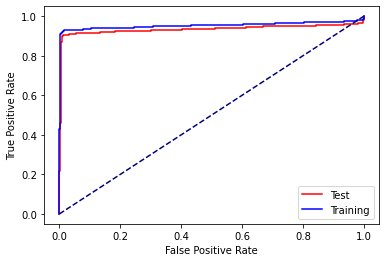

In [54]:
from sklearn.metrics import roc_curve

def generate_probs(X, model= df_search):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs, pos_label= 1)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [55]:
from sklearn.metrics import accuracy_score

log_train_accuracy_g = accuracy_score(y_train,y_train_predictions)

print("Accuracy of logistic regression of training dataset is: ",log_train_accuracy_g*100)

Accuracy of logistic regression of training dataset is:  94.90625


In [56]:
from sklearn.metrics import accuracy_score

log_test_accuracy_g = accuracy_score(y_test,y_test_predictions)

print("Accuracy of logistic regression of testing dataset is: ",log_test_accuracy_g*100)

Accuracy of logistic regression of testing dataset is:  93.0


In [57]:
from sklearn.metrics import precision_score

log_train_precision_g = precision_score(y_train,y_train_predictions)

print("Precision of logistic regression of training dataset is: ",log_train_precision_g*100)

Precision of logistic regression of training dataset is:  99.79137691237831


In [58]:
from sklearn.metrics import precision_score

log_test_precision_g = precision_score(y_test,y_test_predictions)

print("Precision of logistic regression of testing dataset is: ",log_test_precision_g*100)

Precision of logistic regression of testing dataset is:  99.15730337078652


In [59]:
from sklearn.metrics import recall_score

log_train_recall_g = recall_score(y_train,y_train_predictions)

print("Recall of logistic regression of training dataset is: ",log_train_recall_g*100)

Recall of logistic regression of training dataset is:  89.96865203761756


In [60]:
from sklearn.metrics import recall_score

log_test_recall_g = recall_score(y_test,y_test_predictions)

print("Recall of logistic regression of testing dataset is: ",log_test_recall_g*100)

Recall of logistic regression of testing dataset is:  86.94581280788178


**Insert conclusions**

**In the above cells, I have implemented the following:-**

- Created pipeline step that creates logistic regression using PCA.
- I have plotted the ROC_AUC curve and found that the training and testing line are close to each other, which means that the model performs well on unseen data.
- Accuracy of training data and testing data is 95 and 93 respectively.
- Precision of training data and testing data is 99.7 and 99 respectively.
- Recall of training data and testing data is 89.7 and 86.9 respectively.

**I can say that this model performs well on this data than the above model because it has high accuracy.**

# Question 4
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step.  
- Use grid search and evaluate multiple cluster numbers and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [61]:
# Insert code

In [62]:
p = Pipeline([('preprocessor', preprocessor),
             ('kmeans', KMeans(n_clusters=100, n_init='auto')),
             ('logreg', LogisticRegression(solver='liblinear'))])

p = p.fit(X_train, y_train)
p_score = p.score(X_test, y_test)
print(f'Using k-means preprocesser: {p_score:.2%}')

Using k-means preprocesser: 94.12%


In [63]:
# Initialize the grid parameters of logistic regression
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10],  # Strength of regularization
    'logreg__penalty': ['l1', 'l2'],  # Type of regularization
    'logreg__solver': ['liblinear', 'lbfgs'],  # Optimization of solver
    'kmeans__n_clusters': [2, 3, 4, 5, 7, 10]
}

# Create a GridSearchCV for cross validation
grid_search_lr = GridSearchCV(p, param_grid, cv=5, scoring='accuracy', n_jobs=-1) # for parallel processing

# Perform hyperparameter tuning
grid_search_lr.fit(X_train, y_train)

grid_search_lr.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['var3', 'var4', 'var5',
                                                   'var6', 'var7', 'var8',
                                                   'var9', 'var10', 'var11',
                                                   'var12', 'var13', 'var14',
                                                   'var15', 'var16', 'var17',
                                                   'var18', 'var19', 'var20',
                                                   'var21', 'var22', 'var23',
                                                   'var24', 'var25', 'var26',
                                                   'var27', 'var28', 'var29',
                                                   'var30', 'var31', 'var32', ...]),
                                                 ('cat', OneHotEncoder(),
                                                  ['var0', 'var1', 'var2'])])),
                ('kmeans', KMeans(n_clusters=5, n_init='auto')),
                ('logreg', LogisticRegression(C=10, solver='liblinear'))])

In [64]:
y_train_predictions = grid_search_lr.predict(X_train)
y_train_predictions

array([0., 1., 1., ..., 0., 1., 1.])

In [65]:
y_test_predictions = grid_search_lr.predict(X_test)

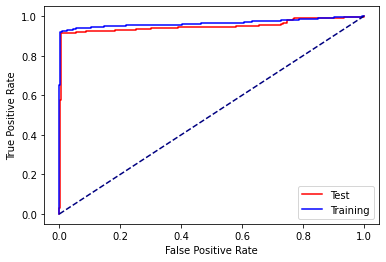

In [66]:
from sklearn.metrics import roc_curve

def generate_probs(X, model= grid_search_lr):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs, pos_label= 1)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [67]:
from sklearn.metrics import accuracy_score

log_train_accuracy_lgc = accuracy_score(y_train,y_train_predictions)

print("Accuracy of logistic regression of training dataset is: ",log_train_accuracy_lgc*100)

Accuracy of logistic regression of training dataset is:  95.53125


In [68]:
from sklearn.metrics import accuracy_score

log_test_accuracy_lgc = accuracy_score(y_test,y_test_predictions)

print("Accuracy of logistic regression of testing dataset is: ",log_test_accuracy_lgc*100)

Accuracy of logistic regression of testing dataset is:  94.5


In [69]:
from sklearn.metrics import precision_score

log_train_precision_lgc = precision_score(y_train,y_train_predictions)

print("Precision of logistic regression of training dataset is: ",log_train_precision_lgc*100)

Precision of logistic regression of training dataset is:  99.79423868312757


In [70]:
from sklearn.metrics import precision_score

log_test_precision_lgc = precision_score(y_test,y_test_predictions)

print("Precision of logistic regression of testing dataset is: ",log_test_precision_lgc*100)

Precision of logistic regression of testing dataset is:  99.4535519125683


In [71]:
from sklearn.metrics import recall_score

log_train_recall_lgc = recall_score(y_train,y_train_predictions)

print("Recall of logistic regression of training dataset is: ",log_train_recall_lgc*100)

Recall of logistic regression of training dataset is:  91.22257053291536


In [72]:
from sklearn.metrics import recall_score

log_test_recall_lgc = recall_score(y_test,y_test_predictions)

print("Recall of logistic regression of testing dataset is: ",log_test_recall_lgc*100)

Recall of logistic regression of testing dataset is:  89.65517241379311


Insert conclusions

**Insert conclusions**

**In the above cells, I have implemented the following:-**

- Created pipeline step that creates logistic regression using k-means clustering.
- I have plotted the ROC_AUC curve and found that the training and testing line are close to each other, which means that the model performs well on unseen data.
- Accuracy of training data and testing data is 95.5 and 94.5 respectively.
- Precision of training data and testing data is 99.7 and 99.4 respectively.
- Recall of training data and testing data is 91.1 and 89.6 respectively.

**I can say that this model performs well on this data than the above two model because it has high accuracy, precision and recall compared to the above models.**

# Question 5
- Which model, based on the results of `Questions 2-4` would you recommend to use?  
- Use as much code as necessary to support your choice.

In [73]:
from sklearn.model_selection import cross_val_score
log_scores = cross_val_score(lr_model, X_train, y_train, cv=5)
print("Cross-Validation Scores of Logistic Regression:", log_scores)

Cross-Validation Scores of Logistic Regression: [0.921875  0.9328125 0.9515625 0.925     0.9546875]


In [74]:
from sklearn.model_selection import cross_val_score
grid_log_scores = cross_val_score(grid_search_lr, X_train, y_train, cv=5)
print("Cross-Validation Scores of Grid Search Logistic Regression:", grid_log_scores)

Cross-Validation Scores of Grid Search Logistic Regression: [0.9453125 0.9609375 0.9578125 0.9421875 0.95625  ]


In [75]:
from sklearn.model_selection import cross_val_score
pca_log_scores = cross_val_score(df_search, X_train, y_train, cv=5)
print("Cross-Validation Scores of PCA Logistic Regression:", pca_log_scores)

Cross-Validation Scores of PCA Logistic Regression: [0.9421875 0.95      0.9546875 0.9359375 0.95625  ]


In [76]:
from sklearn.model_selection import cross_val_score
k_log_scores = cross_val_score(grid_search_lr, X_train, y_train, cv=5)
print("Cross-Validation Scores of K-means Logistic Regression:", k_log_scores)

Cross-Validation Scores of K-means Logistic Regression: [0.9453125 0.9640625 0.9578125 0.9421875 0.9625   ]


**Insert response**

**For answering the above question, I have calculated the cross-validation scores of all the implemented models because it calculates how the model performs on the unseen data. I have found that the logistic regression with K-means clustering, PCA and Grid Search performs better than the other model.**